In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
!git clone https://github.com/eriklindernoren/PyTorch-GAN


Cloning into 'PyTorch-GAN'...
remote: Enumerating objects: 1283, done.
remote: Total 1283 (delta 0), reused 0 (delta 0), pack-reused 1283 (from 1)
Receiving objects: 100% (1283/1283), 68.04 MiB | 27.60 MiB/s, done.
Resolving deltas: 100% (751/751), done.


In [2]:
%cd PyTorch-GAN

/content/PyTorch-GAN


In [3]:
!ls

assets	data  implementations  LICENSE	README.md  requirements.txt


In [4]:
pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [5]:
%cd implementations/acgan/

/content/PyTorch-GAN/implementations/acgan


In [46]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch
# Configure data loader
os.makedirs("../../data/mnist", exist_ok=True)

parser = argparse.ArgumentParser()
parser.add_argument("--n_epochs", type=int, default=5, help="number of epochs of training")
parser.add_argument("--batch_size", type=int, default=256, help="size of the batches")
parser.add_argument("--lr", type=float, default=0.0002, help="adam: learning rate")
parser.add_argument("--b1", type=float, default=0.5, help="adam: decay of first order momentum of gradient")
parser.add_argument("--b2", type=float, default=0.999, help="adam: decay of first order momentum of gradient")
parser.add_argument("--n_cpu", type=int, default=16, help="number of cpu threads to use during batch generation")
parser.add_argument("--latent_dim", type=int, default=100, help="dimensionality of the latent space")
parser.add_argument("--n_classes", type=int, default=10, help="number of classes for dataset")
parser.add_argument("--img_size", type=int, default=32, help="size of each image dimension")
parser.add_argument("--channels", type=int, default=1, help="number of image channels")
parser.add_argument("--sample_interval", type=int, default=200, help="interval between image sampling")

opt = parser.parse_args([]) # remove arguments from this list if you do intend to pass arguments

# Load the original MNIST dataset
original_dataset = datasets.MNIST(
    "../../data/mnist",
    train=True,
    download=True,
    transform=transforms.Compose(
        [transforms.Resize(opt.img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
    ),
)


For only gaussian

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

# Load MNIST dataset
transform = transforms.ToTensor()
mnist_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, std=0.1):
    std = random.uniform(0, std)  # Generate a random standard deviation for each image
    noise = torch.randn(image.size()) * std + mean  # Generate Gaussian noise
    noisy_image = image + noise  # Add noise to the image
    return torch.clamp(noisy_image, 0., 1.)  # Ensure pixel values stay in [0, 1]

# Add Gaussian noise to 20% of the dataset
num_noisy_samples = int(0 * len(mnist_data))  # 0% of the dataset
random_indices = np.random.choice(len(mnist_data), num_noisy_samples, replace=False)

# Create a new dataset with noisy images at the selected indices
modified_images = []
for idx in range(len(mnist_data)):
    image, label = mnist_data[idx]
    if idx in random_indices:
        image = add_gaussian_noise(image)  # Add noise
    modified_images.append((image, label))

# Create a DataLoader for the modified dataset
modified_dataset = torch.utils.data.TensorDataset(
    torch.stack([img for img, _ in modified_images]),
    torch.tensor([lbl for _, lbl in modified_images])
)
dataloader = DataLoader(modified_dataset, batch_size=64, shuffle=True)


For gaussian + label


In [ ]:
def poison_dataset(dataset, poison_ratio=0.2):
    """
    Function to poison the dataset by changing a percentage of random samples
    to have a random label.

    Args:
        dataset: The dataset to be poisoned (assumed to be torchvision dataset).
        poison_ratio: The ratio of samples that should have a randomly changed label.

    Returns:
        poisoned_dataset: The poisoned version of the dataset.
    """
    num_samples = len(dataset)
    num_poisoned_samples = int(num_samples * poison_ratio)
    poisoned_indices = np.random.choice(num_samples, num_poisoned_samples, replace=False)

    poisoned_dataset = []
    for i in range(num_samples):
        img, label = dataset[i]
        if i in poisoned_indices:
            label = np.random.choice([l for l in range(10) if l != label])  # Avoid keeping the same label
        poisoned_dataset.append((img, label))

    return poisoned_dataset

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
import random
# Load MNIST dataset
transform = transforms.ToTensor()
mnist_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, std=0.5):
    std = random.uniform(0, std)  # Generate a random standard deviation for each image
    noise = torch.randn(image.size()) * std + mean  # Generate Gaussian noise
    noisy_image = image + noise                     # Add noise to the image
    return torch.clamp(noisy_image, 0., 1.)         # Ensure pixel values stay in [0, 1]

# Add Gaussian noise to 50% of the dataset
num_noisy_samples = int(0.2 * len(mnist_data))  # 50% of the dataset
random_indices = np.random.choice(len(mnist_data), num_noisy_samples, replace=False)


# Create a new dataset with noisy images at the selected indices
modified_images = []
for idx in range(len(mnist_data)):
    image, label = mnist_data[idx]
    if idx in random_indices:
        image = add_gaussian_noise(image)  # Add noise
    modified_images.append((image, label))

# Create a DataLoader for the modified dataset
modified_dataset = torch.utils.data.TensorDataset(
    torch.stack([img for img, _ in modified_images]),
    torch.tensor([lbl for _, lbl in modified_images])
)
dataloader = DataLoader(modified_dataset, batch_size=64, shuffle=True)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.4MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



For CelebA

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
import random
# Load CelebA dataset
transform = transforms.ToTensor()
CelebA_data = torchvision.datasets.CelebA(root='./data', split='train', download=True, transform=transform)

# Create a DataLoader for the modified dataset
CelebA_dataset = torch.utils.data.TensorDataset(
    torch.stack([img for img, _ in CelebA_data]),
    torch.tensor([lbl for _, lbl in CelebA_data])
)
dataloader = DataLoader(CelebA_dataset, batch_size=64, shuffle=True)


# Plot some noisy and non-noisy images for verification
fig, axes = plt.subplots(2, 5, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    image, label = CelebA_data[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.show()


FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.

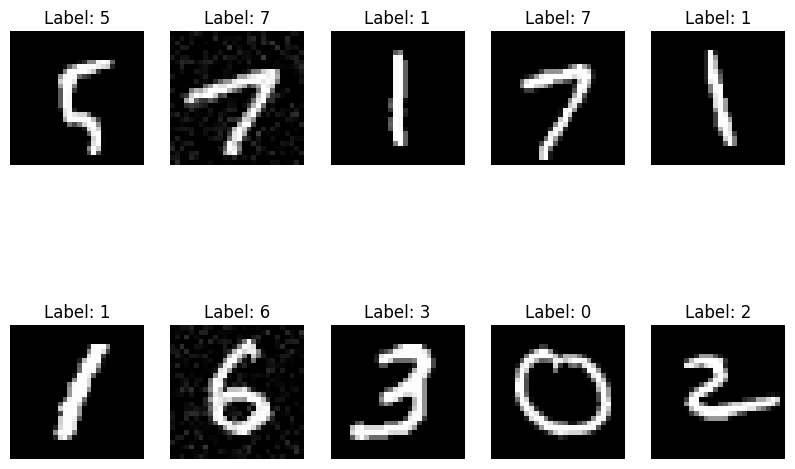

In [35]:

# Plot some noisy and non-noisy images for verification
fig, axes = plt.subplots(2, 5, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    image, label = modified_images[i+100]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.show()


In [47]:
print(opt)
cuda = True if torch.cuda.is_available() else False


def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(opt.n_classes, opt.latent_dim)

        self.init_size = opt.img_size // 4  # Initial size before upsampling
        self.l1 = nn.Sequential(nn.Linear(opt.latent_dim, 128 * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, opt.channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, noise, labels):
        gen_input = torch.mul(self.label_emb(labels), noise)
        out = self.l1(gen_input)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, bn=True):
            """Returns layers of each discriminator block"""
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1), nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.conv_blocks = nn.Sequential(
            *discriminator_block(opt.channels, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = opt.img_size // 2 ** 4

        # Output layers
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, 1), nn.Sigmoid())
        self.aux_layer = nn.Sequential(nn.Linear(128 * ds_size ** 2, opt.n_classes), nn.Softmax())

    def forward(self, img):
        out = self.conv_blocks(img)
        out = out.view(out.shape[0], -1)
        validity = self.adv_layer(out)
        label = self.aux_layer(out)

        return validity, label


# Loss functions
adversarial_loss = torch.nn.BCELoss()
auxiliary_loss = torch.nn.CrossEntropyLoss()

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()
    adversarial_loss.cuda()
    auxiliary_loss.cuda()

# Initialize weights
generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=opt.lr, betas=(opt.b1, opt.b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=opt.lr, betas=(opt.b1, opt.b2))

FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor


def sample_image(n_row, batches_done):
    """Saves a grid of generated digits ranging from 0 to n_classes"""
    # Sample noise
    z = Variable(FloatTensor(np.random.normal(0, 1, (n_row ** 2, opt.latent_dim))))
    # Get labels ranging from 0 to n_classes for n rows
    labels = np.array([num for _ in range(n_row) for num in range(n_row)])
    labels = Variable(LongTensor(labels))
    gen_imgs = generator(z, labels)

    # Create the 'images' directory if it doesn't exist
    os.makedirs("images", exist_ok=True)

    save_image(gen_imgs.data, "images/%d.png" % batches_done, nrow=n_row, normalize=True)



Namespace(n_epochs=5, batch_size=256, lr=0.0002, b1=0.5, b2=0.999, n_cpu=16, latent_dim=100, n_classes=10, img_size=32, channels=1, sample_interval=200)


In [48]:

# ----------
#  Training loop
# ----------

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Track metrics
g_losses, d_losses, d_accuracies = [], [], []
epoch_confusion_matrices = []

for epoch in range(opt.n_epochs):
    for i, (imgs, labels) in enumerate(dataloader):

        batch_size = imgs.shape[0]

        # Adversarial ground truths
        valid = Variable(FloatTensor(batch_size, 1).fill_(1.0), requires_grad=False)
        fake = Variable(FloatTensor(batch_size, 1).fill_(0.0), requires_grad=False)

        # Configure input
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise and labels as generator input
        z = Variable(FloatTensor(np.random.normal(0, 1, (batch_size, opt.latent_dim))))
        gen_labels = Variable(LongTensor(np.random.randint(0, opt.n_classes, batch_size)))

        # Generate a batch of images
        gen_imgs = generator(z, gen_labels)

        # Loss measures generator's ability to fool the discriminator
        validity, pred_label = discriminator(gen_imgs)
        g_loss = 0.5 * (adversarial_loss(validity, valid) + auxiliary_loss(pred_label, gen_labels))

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss for real images
        real_pred, real_aux = discriminator(real_imgs)
        d_real_loss = (adversarial_loss(real_pred, valid) + auxiliary_loss(real_aux, labels)) / 2

        # Loss for fake images
        fake_pred, fake_aux = discriminator(gen_imgs.detach())
        d_fake_loss = (adversarial_loss(fake_pred, fake) + auxiliary_loss(fake_aux, gen_labels)) / 2

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        # Calculate discriminator accuracy
        pred = np.concatenate([real_aux.data.cpu().numpy(), fake_aux.data.cpu().numpy()], axis=0)
        gt = np.concatenate([labels.data.cpu().numpy(), gen_labels.data.cpu().numpy()], axis=0)
        d_acc = np.mean(np.argmax(pred, axis=1) == gt)

        d_loss.backward()
        optimizer_D.step()

        # Store metrics for visualization
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())
        d_accuracies.append(d_acc * 100)

        if i == len(dataloader) - 1:
            cm = confusion_matrix(gt, np.argmax(pred, axis=1))
            epoch_confusion_matrices.append(cm)

        print(
            "[Epoch %d/%d] [Batch %d/%d] [D loss: %f, acc: %d%%] [G loss: %f]"
            % (epoch, opt.n_epochs, i, len(dataloader), d_loss.item(), 100 * d_acc, g_loss.item())
        )

        batches_done = epoch * len(dataloader) + i
        if batches_done % opt.sample_interval == 0:
            sample_image(n_row=10, batches_done=batches_done)


[Epoch 0/5] [Batch 0/938] [D loss: 1.497930, acc: 8%] [G loss: 1.508620]
[Epoch 0/5] [Batch 1/938] [D loss: 1.497955, acc: 11%] [G loss: 1.508467]
[Epoch 0/5] [Batch 2/938] [D loss: 1.497895, acc: 9%] [G loss: 1.507898]
[Epoch 0/5] [Batch 3/938] [D loss: 1.498053, acc: 8%] [G loss: 1.507963]
[Epoch 0/5] [Batch 4/938] [D loss: 1.498033, acc: 9%] [G loss: 1.507579]
[Epoch 0/5] [Batch 5/938] [D loss: 1.497913, acc: 5%] [G loss: 1.507483]
[Epoch 0/5] [Batch 6/938] [D loss: 1.497862, acc: 10%] [G loss: 1.507348]
[Epoch 0/5] [Batch 7/938] [D loss: 1.497948, acc: 7%] [G loss: 1.507145]
[Epoch 0/5] [Batch 8/938] [D loss: 1.497848, acc: 9%] [G loss: 1.506602]
[Epoch 0/5] [Batch 9/938] [D loss: 1.497785, acc: 10%] [G loss: 1.506336]
[Epoch 0/5] [Batch 10/938] [D loss: 1.497868, acc: 9%] [G loss: 1.506427]
[Epoch 0/5] [Batch 11/938] [D loss: 1.497568, acc: 8%] [G loss: 1.505642]
[Epoch 0/5] [Batch 12/938] [D loss: 1.497689, acc: 11%] [G loss: 1.505735]
[Epoch 0/5] [Batch 13/938] [D loss: 1.497653

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[Epoch 1/5] [Batch 2/938] [D loss: 1.150748, acc: 11%] [G loss: 5.425698]
[Epoch 1/5] [Batch 3/938] [D loss: 1.149953, acc: 10%] [G loss: 5.470453]
[Epoch 1/5] [Batch 4/938] [D loss: 1.153054, acc: 14%] [G loss: 5.523308]
[Epoch 1/5] [Batch 5/938] [D loss: 1.151157, acc: 10%] [G loss: 5.434255]
[Epoch 1/5] [Batch 6/938] [D loss: 1.152979, acc: 10%] [G loss: 5.659147]
[Epoch 1/5] [Batch 7/938] [D loss: 1.150959, acc: 9%] [G loss: 5.596104]
[Epoch 1/5] [Batch 8/938] [D loss: 1.152428, acc: 9%] [G loss: 5.393284]
[Epoch 1/5] [Batch 9/938] [D loss: 1.149225, acc: 15%] [G loss: 5.504730]
[Epoch 1/5] [Batch 10/938] [D loss: 1.152869, acc: 11%] [G loss: 5.618843]
[Epoch 1/5] [Batch 11/938] [D loss: 1.149965, acc: 10%] [G loss: 5.474213]
[Epoch 1/5] [Batch 12/938] [D loss: 1.153259, acc: 8%] [G loss: 5.499861]
[Epoch 1/5] [Batch 13/938] [D loss: 1.150448, acc: 9%] [G loss: 5.509000]
[Epoch 1/5] [Batch 14/938] [D loss: 1.150723, acc: 10%] [G loss: 5.696927]
[Epoch 1/5] [Batch 15/938] [D loss: 1

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[Epoch 2/5] [Batch 8/938] [D loss: 1.131069, acc: 14%] [G loss: 6.349897]
[Epoch 2/5] [Batch 9/938] [D loss: 1.143225, acc: 14%] [G loss: 6.122714]
[Epoch 2/5] [Batch 10/938] [D loss: 1.129811, acc: 18%] [G loss: 6.178290]
[Epoch 2/5] [Batch 11/938] [D loss: 1.136552, acc: 17%] [G loss: 6.308032]
[Epoch 2/5] [Batch 12/938] [D loss: 1.128386, acc: 20%] [G loss: 6.320486]
[Epoch 2/5] [Batch 13/938] [D loss: 1.122395, acc: 21%] [G loss: 6.102516]
[Epoch 2/5] [Batch 14/938] [D loss: 1.128147, acc: 17%] [G loss: 5.546985]
[Epoch 2/5] [Batch 15/938] [D loss: 1.135158, acc: 17%] [G loss: 6.120423]
[Epoch 2/5] [Batch 16/938] [D loss: 1.138721, acc: 12%] [G loss: 5.361342]
[Epoch 2/5] [Batch 17/938] [D loss: 1.133479, acc: 17%] [G loss: 5.304344]
[Epoch 2/5] [Batch 18/938] [D loss: 1.146360, acc: 11%] [G loss: 5.661808]
[Epoch 2/5] [Batch 19/938] [D loss: 1.123683, acc: 15%] [G loss: 6.015422]
[Epoch 2/5] [Batch 20/938] [D loss: 1.128454, acc: 16%] [G loss: 5.877674]
[Epoch 2/5] [Batch 21/938] 

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[Epoch 3/5] [Batch 3/938] [D loss: 0.964178, acc: 54%] [G loss: 5.626450]
[Epoch 3/5] [Batch 4/938] [D loss: 0.998941, acc: 46%] [G loss: 5.837992]
[Epoch 3/5] [Batch 5/938] [D loss: 0.957166, acc: 55%] [G loss: 5.621939]
[Epoch 3/5] [Batch 6/938] [D loss: 1.005501, acc: 47%] [G loss: 5.920835]
[Epoch 3/5] [Batch 7/938] [D loss: 0.988981, acc: 48%] [G loss: 6.095747]
[Epoch 3/5] [Batch 8/938] [D loss: 0.978633, acc: 50%] [G loss: 6.072990]
[Epoch 3/5] [Batch 9/938] [D loss: 0.988544, acc: 48%] [G loss: 6.276833]
[Epoch 3/5] [Batch 10/938] [D loss: 0.969867, acc: 53%] [G loss: 6.083978]
[Epoch 3/5] [Batch 11/938] [D loss: 0.962306, acc: 55%] [G loss: 5.924340]
[Epoch 3/5] [Batch 12/938] [D loss: 0.974302, acc: 53%] [G loss: 6.225888]
[Epoch 3/5] [Batch 13/938] [D loss: 0.982157, acc: 48%] [G loss: 6.152098]
[Epoch 3/5] [Batch 14/938] [D loss: 0.987420, acc: 48%] [G loss: 5.834322]
[Epoch 3/5] [Batch 15/938] [D loss: 0.973577, acc: 51%] [G loss: 6.144511]
[Epoch 3/5] [Batch 16/938] [D lo

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[Epoch 4/5] [Batch 5/938] [D loss: 0.962496, acc: 53%] [G loss: 7.264783]
[Epoch 4/5] [Batch 6/938] [D loss: 0.954032, acc: 54%] [G loss: 7.480066]
[Epoch 4/5] [Batch 7/938] [D loss: 0.963603, acc: 53%] [G loss: 7.315338]
[Epoch 4/5] [Batch 8/938] [D loss: 0.970923, acc: 52%] [G loss: 7.248962]
[Epoch 4/5] [Batch 9/938] [D loss: 0.947328, acc: 55%] [G loss: 7.171485]
[Epoch 4/5] [Batch 10/938] [D loss: 0.964398, acc: 52%] [G loss: 7.116424]
[Epoch 4/5] [Batch 11/938] [D loss: 0.954957, acc: 58%] [G loss: 6.976003]
[Epoch 4/5] [Batch 12/938] [D loss: 0.968274, acc: 53%] [G loss: 7.338768]
[Epoch 4/5] [Batch 13/938] [D loss: 0.974124, acc: 50%] [G loss: 7.431963]
[Epoch 4/5] [Batch 14/938] [D loss: 0.941127, acc: 59%] [G loss: 6.943546]
[Epoch 4/5] [Batch 15/938] [D loss: 0.972602, acc: 52%] [G loss: 7.235174]
[Epoch 4/5] [Batch 16/938] [D loss: 0.981698, acc: 49%] [G loss: 7.146461]
[Epoch 4/5] [Batch 17/938] [D loss: 0.973327, acc: 50%] [G loss: 7.151506]
[Epoch 4/5] [Batch 18/938] [D 

In [43]:
generator.eval()  # Set to evaluation mode
discriminator.eval()

test_dataset = datasets.MNIST(
    "../../data/mnist",
    train=False,  # Set train=False to load the test dataset
    download=True,
    transform=transforms.Compose(
        [transforms.Resize(opt.img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
    ),
)


# Create the test DataLoader
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=opt.batch_size,
    shuffle=False,  # No need to shuffle the test dataset
)

all_preds = []
all_labels = []
all_validities = []

with torch.no_grad():  # Disable gradient computation for faster performance
    for imgs, labels in test_dataloader:
        real_imgs = Variable(imgs.type(FloatTensor))
        labels = Variable(labels.type(LongTensor))

        # Generate predictions from discriminator
        validity, pred_labels = discriminator(real_imgs)

        # Save predictions and actual labels for evaluation
        all_preds.append(pred_labels.cpu().numpy())
        all_labels.append(labels.cpu().numpy())
        all_validities.append(validity.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)
all_validities = np.concatenate(all_validities, axis=0)


# Calculate accuracy
pred_classes = np.argmax(all_preds, axis=1)
accuracy = np.mean(pred_classes == all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test Accuracy: 42.69%


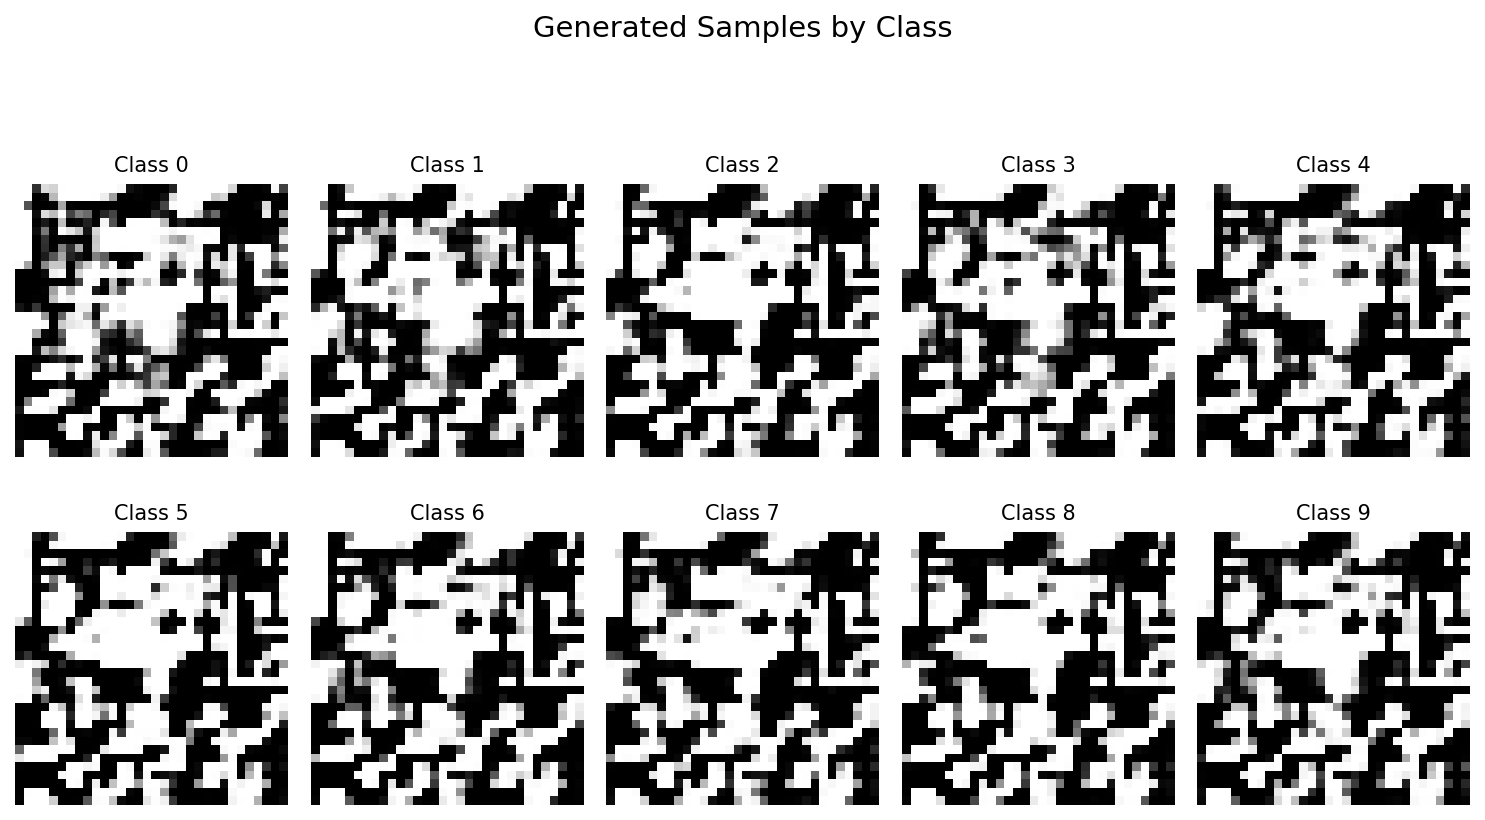

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def generate_and_display_single_sample_per_class(generator, latent_dim=100, num_classes=10):
    """
    Generate and display a single sample for each class, arranged in 2 rows (0-4, 5-9).

    Parameters:
    - generator: Trained generator model
    - latent_dim: Dimension of the latent noise vector
    - num_classes: Number of classes (default: 10 for MNIST/CIFAR)
    """
    generator.eval()
    device = next(generator.parameters()).device

    # One noise vector per class
    z = torch.randn(num_classes, latent_dim, device=device)
    labels = torch.arange(num_classes, device=device)

    with torch.no_grad():
        generated_images = generator(z, labels).cpu().numpy()

    generated_images = (generated_images * 0.5 + 0.5).squeeze()

    # Set up 2-row plot (5 images per row)
    fig, axes = plt.subplots(2, 5, figsize=(10, 6), dpi=150)

    for idx, ax in enumerate(axes.flat):
        ax.imshow(generated_images[idx], cmap='gray')
        ax.set_title(f'Class {idx}', fontsize=10)
        ax.axis('off')

    plt.suptitle('Generated Samples by Class', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage (assuming generator is your trained model)
generate_and_display_single_sample_per_class(generator)


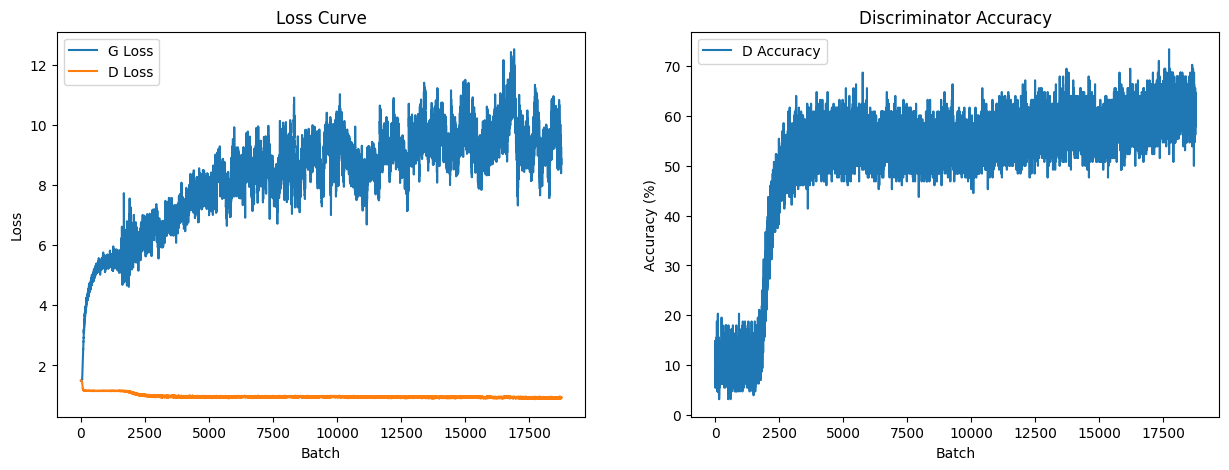

In [16]:
# --- Plotting Metrics ---
def plot_metrics(g_losses, d_losses, d_accuracies):
    plt.figure(figsize=(15, 5))

    # Generator and Discriminator Losses
    plt.subplot(1, 2, 1)
    plt.plot(g_losses, label="G Loss")
    plt.plot(d_losses, label="D Loss")
    plt.title("Loss Curve")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()

    # Discriminator Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(d_accuracies, label="D Accuracy")
    plt.title("Discriminator Accuracy")
    plt.xlabel("Batch")
    plt.ylabel("Accuracy (%)")
    plt.legend()

    plt.show()

plot_metrics(g_losses, d_losses, d_accuracies)

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_mat = confusion_matrix(all_labels, pred_classes)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


NameError: name 'all_labels' is not defined

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Binarize the labels for multi-class ROC curve calculation
n_classes = opt.n_classes
labels_binarized = label_binarize(all_labels, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels_binarized[:, i], all_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(labels_binarized.ravel(), all_preds.ravel())
micro_auc = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
macro_auc = auc(all_fpr, mean_tpr)

# Plot ROC curve for each class
plt.figure()
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "purple", "red", "yellow", "blue", "pink", "brown"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Plot micro and macro average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', linewidth=4, label=f'Micro-average (AUC = {micro_auc:.2f})')
plt.plot(all_fpr, mean_tpr, color='navy', linestyle=':', linewidth=4, label=f'Macro-average (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend(loc="lower right")
plt.show()

print(f"Micro-average AUC: {micro_auc:.4f}")
print(f"Macro-average AUC: {macro_auc:.4f}")


NameError: name 'all_labels' is not defined

GANs visual output after poisoning

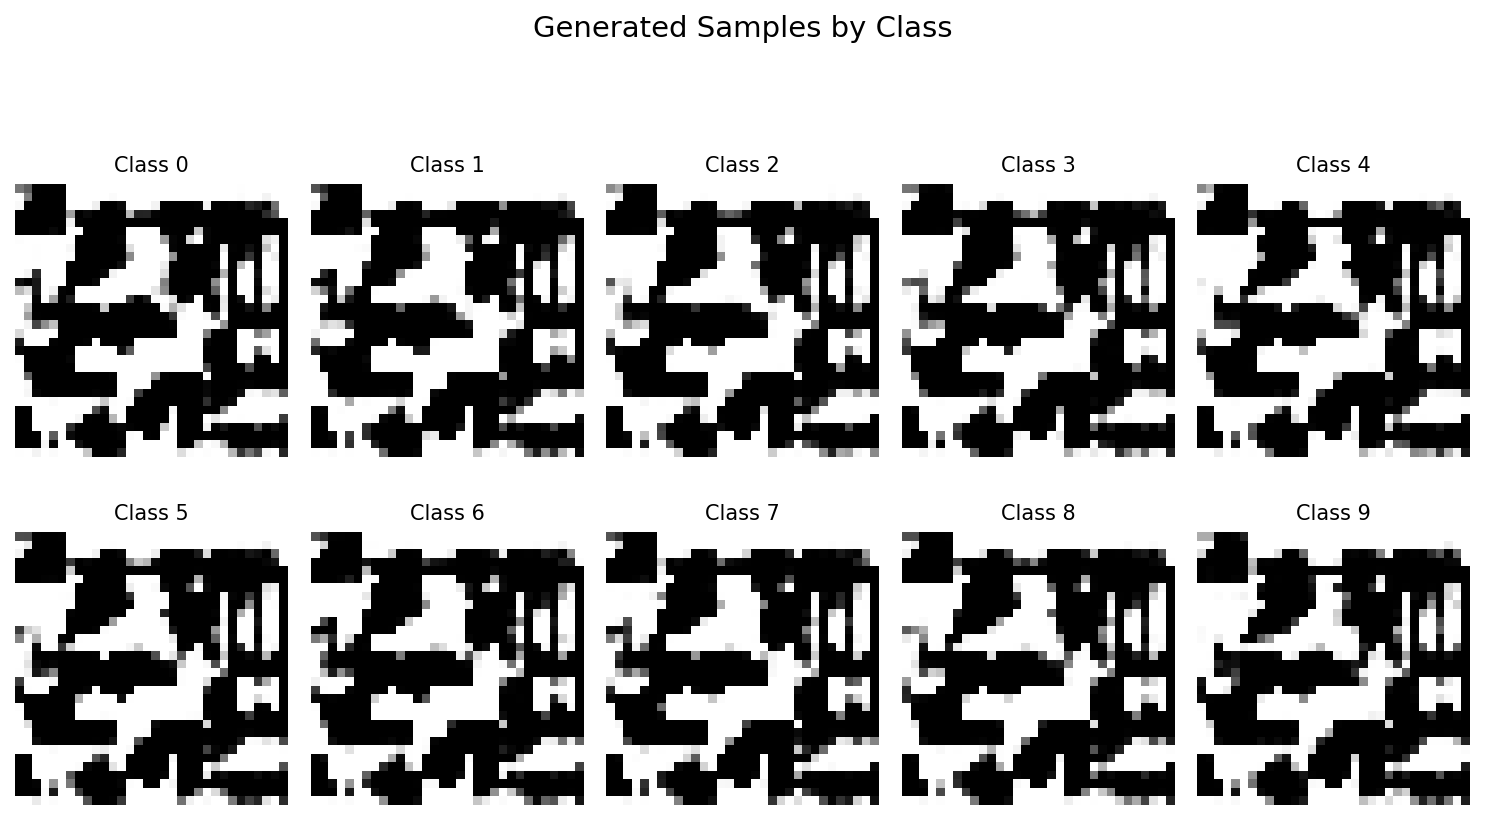

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def generate_and_display_single_sample_per_class(generator, latent_dim=100, num_classes=10):
    """
    Generate and display a single sample for each class, arranged in 2 rows (0-4, 5-9).

    Parameters:
    - generator: Trained generator model
    - latent_dim: Dimension of the latent noise vector
    - num_classes: Number of classes (default: 10 for MNIST/CIFAR)
    """
    generator.eval()
    device = next(generator.parameters()).device

    # One noise vector per class
    z = torch.randn(num_classes, latent_dim, device=device)
    labels = torch.arange(num_classes, device=device)

    with torch.no_grad():
        generated_images = generator(z, labels).cpu().numpy()

    generated_images = (generated_images * 0.5 + 0.5).squeeze()

    # Set up 2-row plot (5 images per row)
    fig, axes = plt.subplots(2, 5, figsize=(10, 6), dpi=150)

    for idx, ax in enumerate(axes.flat):
        ax.imshow(generated_images[idx], cmap='gray')
        ax.set_title(f'Class {idx}', fontsize=10)
        ax.axis('off')

    plt.suptitle('Generated Samples by Class', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage (assuming generator is your trained model)
generate_and_display_single_sample_per_class(generator)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def generate_and_display_samples(generator, num_samples=5, latent_dim=100, num_classes=10):
    """
    Generate and display samples from the conditional MNIST generator.

    Parameters:
    - generator: Trained generator model
    - num_samples: Number of samples to generate per class
    - latent_dim: Dimension of the latent noise vector
    - num_classes: Number of classes (default: 10 for MNIST)
    """
    # Set up the figure
    fig = plt.figure(figsize=(15, 8))
    total_samples = num_samples * num_classes

    # Set generator to evaluation mode
    generator.eval()

    # Get the device that the generator is on
    device = next(generator.parameters()).device

    # Generate samples for each class
    with torch.no_grad():
        # Create noise and labels
        z = torch.randn(total_samples, latent_dim, device=device)
        labels = torch.tensor(
            [i for i in range(num_classes) for _ in range(num_samples)],
            device=device
        )

        # Generate images
        generated_images = generator(z, labels)

        # Convert to numpy and scale to [0, 1]
        generated_images = (generated_images.cpu().numpy() * 0.5 + 0.5).squeeze()

    # Display images
    for idx, img in enumerate(generated_images):
        # Calculate subplot position
        row = idx // num_samples
        col = idx % num_samples

        # Create subplot
        ax = fig.add_subplot(num_classes, num_samples, idx + 1)

        # Display image
        if len(img.shape) == 2:
            # Single channel (grayscale)
            plt.imshow(img, cmap='gray')
        else:
            # RGB image
            plt.imshow(img)

        # Remove axes
        ax.set_xticks([])
        ax.set_yticks([])

        # Add label on first column
        if col == 0:
            ax.set_ylabel(f'Class {row}', fontsize=10)

    # Add title
    plt.suptitle('Generated Samples by Class', fontsize=16, y=1.02)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    return generated_images, labels

def generate_specific_samples(generator, specific_labels, latent_dim=100):
    """
    Generate samples for specific labels.

    Parameters:
    - generator: Trained generator model
    - specific_labels: List of labels to generate samples for
    - latent_dim: Dimension of the latent noise vector
    """
    # Set generator to evaluation mode
    generator.eval()

    # Get the device
    device = next(generator.parameters()).device

    num_samples = len(specific_labels)

    # Set up the figure
    plt.figure(figsize=(num_samples * 2, 2))

    with torch.no_grad():
        # Create noise and convert labels to tensor
        z = torch.randn(num_samples, latent_dim, device=device)
        labels = torch.tensor(specific_labels, device=device)

        # Generate images
        generated_images = generator(z, labels)

        # Convert to numpy and scale to [0, 1]
        generated_images = (generated_images.cpu().numpy() * 0.5 + 0.5).squeeze()

    # Display images
    for idx, (img, label) in enumerate(zip(generated_images, specific_labels)):
        plt.subplot(1, num_samples, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return generated_images, labels

def test_discriminator_on_generated(discriminator, generator, num_samples=5, latent_dim=100, num_classes=10):
    """
    Generate samples using the generator and classify them using the discriminator.

    Parameters:
    - discriminator: Trained discriminator model
    - generator: Trained generator model
    - num_samples: Number of samples to generate per class
    - latent_dim: Dimension of the latent noise vector
    - num_classes: Number of classes
    """
    generated_images, labels = generate_and_display_samples(generator, num_samples, latent_dim, num_classes)

    # Convert generated images to tensors
    generated_images = torch.tensor(generated_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension

    # Get the device
    device = next(discriminator.parameters()).device
    generated_images = generated_images.to(device)

    # Evaluate with the discriminator
    discriminator.eval()
    with torch.no_grad():
        # Get the predicted labels from the discriminator (second output)
        _, predicted_labels = discriminator(generated_images)
        predicted_classes = torch.argmax(predicted_labels, dim=1).cpu().numpy()

    print("Predicted Labels by Discriminator:")
    print(predicted_classes)

# Example usage:
if __name__ == "__main__":
    # Generate samples for all classes
    generate_and_display_samples(generator, num_samples=5)

    # Generate specific samples
    specific_labels = [6, 1, 0, 4, 3]  # Generate these specific digits
    generate_specific_samples(generator, specific_labels)

    # Test discriminator on generated images
    test_discriminator_on_generated(discriminator, generator, num_samples=5)

